# Crisp DM Workflow

# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data set

In [2]:
df = pd.read_csv("pollutant-standards-index-southtangerang-2020-2022.csv")
df

,Date,PM2.5,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,45,30,2,69,19.0,0,69,CO,Moderate
1,1/2/2020,44,16,2,58,33.0,0,58,CO,Moderate
2,1/3/2020,43,12,2,46,18.0,0,46,CO,Good
3,1/4/2020,40,8,2,84,29.0,0,84,CO,Moderate
4,1/5/2020,38,8,3,50,0.0,0,50,CO,Good
...,...,...,...,...,...,...,...,...,...,...
1091,12/27/2022,50,19,16,12,NaN,4,19,PM2.5,Moderate
1092,12/28/2022,51,20,16,12,NaN,4,20,PM2.5,Moderate
1093,12/29/2022,52,21,16,13,NaN,4,21,PM2.5,Moderate
1094,12/30/2022,53,22,17,13,NaN,4,22,PM2.5,Moderate


# Data Understanding

## Penjelasan Feature dataset

In [3]:
feature_dataset = pd.Series(["Date","PM10","SO2","CO","O3","NO2","Max","Critical Component","Categoy"],index=[1,2,3,4,5,6,7,8,9])
penjelasan_feature = pd.Series(["Tanggal pengukuran","Pengukuran Materi Partikulat","Pengukuran Sulfur Dioksida","Pengukuran Karbon Monoksida","Pengukuran ozon","Pengukuran Natrium DIoksida","Nilai pengukuran tertinggi","Komponen nilai pengukuran tertinggi","Kategori pencemaran udara baik atau tidak"],index=[1,2,3,4,5,6,7,8,9])

deskripsi_variabel = pd.DataFrame({"Nama Feature":feature_dataset,
                                  "Penjelasan":penjelasan_feature})
deskripsi_variabel

,Nama Feature,Penjelasan
1,Date,Tanggal pengukuran
2,PM10,Pengukuran Materi Partikulat
3,SO2,Pengukuran Sulfur Dioksida
4,CO,Pengukuran Karbon Monoksida
5,O3,Pengukuran ozon
6,NO2,Pengukuran Natrium DIoksida
7,Max,Nilai pengukuran tertinggi
8,Critical Component,Komponen nilai pengukuran tertinggi
9,Categoy,Kategori pencemaran udara baik atau tidak


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1096 non-null   object 
 1   PM2.5               1096 non-null   int64  
 2   PM10                1096 non-null   int64  
 3   SO2                 1096 non-null   int64  
 4   CO                  1096 non-null   int64  
 5   O3                  1036 non-null   float64
 6   NO2                 1096 non-null   int64  
 7   Max                 1096 non-null   int64  
 8   Critical Component  1096 non-null   object 
 9   Category            1096 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 85.8+ KB


## Statistik Deskriptif

In [5]:
df.describe()

,PM2.5,PM10,SO2,CO,O3,NO2,Max
count,1096.000000,1096.000000,1096.000000,1096.000000,1036.000000,1096.000000,1096.000000
mean,44.193431,18.738139,10.580292,18.820255,20.960425,2.374088,29.235401
std,10.826190,7.290818,8.068708,17.066338,12.467208,2.227808,15.907933
min,19.000000,3.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,35.000000,13.000000,1.000000,10.000000,15.000000,0.000000,20.000000
50%,45.000000,17.000000,14.000000,12.000000,20.000000,3.000000,24.000000
75%,53.000000,23.000000,16.000000,21.000000,26.000000,4.000000,31.000000
max,66.000000,60.000000,28.000000,164.000000,81.000000,8.000000,164.000000


In [6]:
df["Critical Component"].value_counts()

PM2.5       615
CO          222
O3          181
PM10         70
PM10,O3       4
CO, PM10      2
PM10, CO      1
PM10,CO       1
Name: Critical Component, dtype: int64

# Data Prepatration

## Data Cleansing

### Mengecek nilai hilang

In [7]:
df.isna().sum()

Date                   0
PM2.5                  0
PM10                   0
SO2                    0
CO                     0
O3                    60
NO2                    0
Max                    0
Critical Component     0
Category               0
dtype: int64

### Mengisi Missing value dengan nilai Mean pada O3

In [8]:
df["O3"] = df["O3"].fillna(df["O3"].mean())

In [9]:
df.isna().sum()

Date                  0
PM2.5                 0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

In [10]:
df.describe()

,PM2.5,PM10,SO2,CO,O3,NO2,Max
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,44.193431,18.738139,10.580292,18.820255,20.960425,2.374088,29.235401
std,10.826190,7.290818,8.068708,17.066338,12.120829,2.227808,15.907933
min,19.000000,3.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,35.000000,13.000000,1.000000,10.000000,15.000000,0.000000,20.000000
50%,45.000000,17.000000,14.000000,12.000000,20.000000,3.000000,24.000000
75%,53.000000,23.000000,16.000000,21.000000,25.000000,4.000000,31.000000
max,66.000000,60.000000,28.000000,164.000000,81.000000,8.000000,164.000000


## Normalisasi data dengan minmax scaler

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data X yang akan dinormalisasi (kecuali 'IE EXP (%)')
X_data = df[['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max']]

# Inisialisasi MinMaxScaler untuk X
scaler_X = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X_data)

# Mengganti kolom-kolom dalam data_model dengan data yang sudah dinormalisasi
df[['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max']] = X_normalized

# Kolom 'IE EXP (%)' tidak perlu dinormalisasi
# Sekarang Anda dapat menggabungkan data yang sudah dinormalisasi dengan 'IE EXP (%)'
df = df

NameError: name 'df' is not defined

### Mengecek Outlier

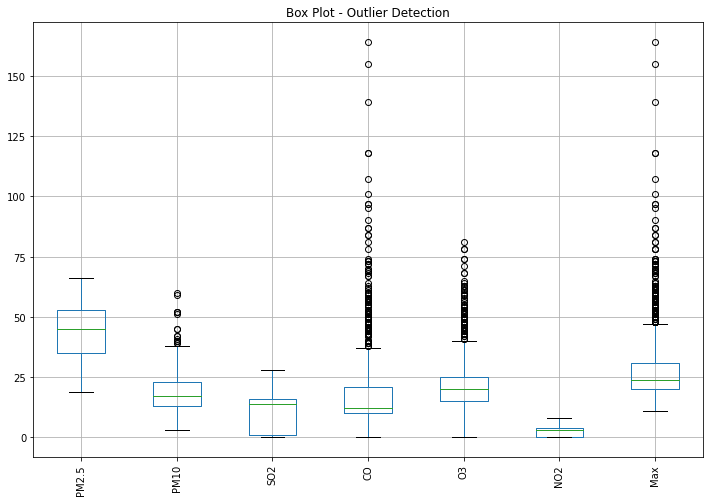

In [11]:
# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot - Outlier Detection')
plt.xticks(rotation=90)
plt.show()

## Label Encoder

In [12]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['Critical Component']= label_encoder.fit_transform(df['Critical Component']) 
df.head()

,Date,PM2.5,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,45,30,2,69,19.0,0,69,0,Moderate
1,1/2/2020,44,16,2,58,33.0,0,58,0,Moderate
2,1/3/2020,43,12,2,46,18.0,0,46,0,Good
3,1/4/2020,40,8,2,84,29.0,0,84,0,Moderate
4,1/5/2020,38,8,3,50,0.0,0,50,0,Good


# MOdeling

In [13]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Contoh dataset klasifikasi (ganti dengan dataset sesuai kebutuhan)
from sklearn.datasets import load_digits
digits = load_digits()
X = df.drop(["Category","Date","Critical Component"],axis=1)
y = df["Category"]

# Pembagian data training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Decision Tree: {accuracy * 100:.2f}%')

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Akurasi model Decision Tree: 80.00%
Classification Report:
               precision    recall  f1-score   support

        Good       0.75      0.78      0.76        76
    Moderate       0.85      0.85      0.85       130
   Unhealthy       0.55      0.43      0.48        14

    accuracy                           0.80       220
   macro avg       0.72      0.69      0.70       220
weighted avg       0.80      0.80      0.80       220



In [14]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Contoh dataset klasifikasi (ganti dengan dataset sesuai kebutuhan)
from sklearn.datasets import load_digits
digits = load_digits()
X = df.drop(["Category", "Date", "Critical Component"], axis=1)
y = df["Category"]

# Pembagian data training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Naive Bayes (GaussianNB)
model = GaussianNB()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Naive Bayes: {accuracy * 100:.2f}%')

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Akurasi model Naive Bayes: 38.18%
Classification Report:
               precision    recall  f1-score   support

        Good       0.37      0.45      0.40        76
    Moderate       0.90      0.28      0.42       130
   Unhealthy       0.16      1.00      0.27        14

    accuracy                           0.38       220
   macro avg       0.48      0.57      0.37       220
weighted avg       0.67      0.38      0.41       220



In [71]:
# Import library
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Contoh dataset klasifikasi (ganti dengan dataset sesuai kebutuhan)
from sklearn.datasets import load_digits
digits = load_digits()
X = df.drop(["Category","Date","Critical Component"], axis=1)
y = df["Category"]

# Pembagian data training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model CatBoost
model = CatBoostClassifier(random_state=42, verbose=0)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model CatBoost: {accuracy * 100:.2f}%')

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Akurasi model CatBoost: 84.55%
Classification Report:
               precision    recall  f1-score   support

        Good       0.81      0.79      0.80        76
    Moderate       0.87      0.91      0.89       130
   Unhealthy       0.73      0.57      0.64        14

    accuracy                           0.85       220
   macro avg       0.80      0.76      0.78       220
weighted avg       0.84      0.85      0.84       220



# SMote

In [64]:
from imblearn.over_sampling import SMOTE  # imblearn untuk penanganan ketidakseimbangan kelas (Oversampling)
# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42) #Memangil SMOTE dengan random state 42  menghasilkan hasil yang dapat direproduksi secara konsisten. 
X_resampled, y_resampled = smote.fit_resample(X, y) # menyimpan hasil over samping tersebut pada x y resampled

# Membagi data menjadi data latih dan data uji
X_train_oversampled2, X_test_oversampled2, y_train_oversampled2, y_test_oversampled2 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Accuracy: 0.9088541666666666
Classification Report:
               precision    recall  f1-score   support

        Good       0.89      0.88      0.88       121
    Moderate       0.90      0.89      0.89       135
   Unhealthy       0.94      0.96      0.95       128

    accuracy                           0.91       384
   macro avg       0.91      0.91      0.91       384
weighted avg       0.91      0.91      0.91       384



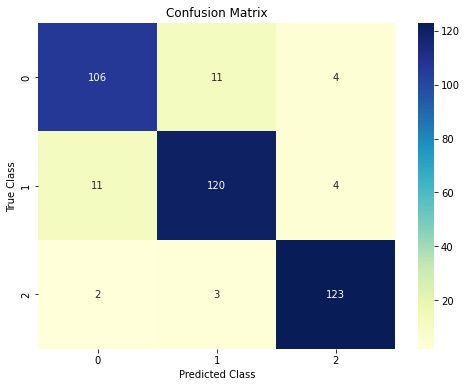

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat model Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# Melatih model
dt_classifier.fit(X_train_oversampled2, y_train_oversampled2)

# Melakukan prediksi pada data oversampled
y_pred_oversampled = dt_classifier.predict(X_test_oversampled2)

# Evaluasi model
accuracy_oversampled = accuracy_score(y_test_oversampled2, y_pred_oversampled)
report_oversampled = classification_report(y_test_oversampled2, y_pred_oversampled)
confusion_mat_oversampled = confusion_matrix(y_test_oversampled2, y_pred_oversampled)

print("Accuracy:", accuracy_oversampled)
print("Classification Report:\n", report_oversampled)

# Memvisualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_oversampled, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


Accuracy: 0.9036458333333334
Classification Report:
               precision    recall  f1-score   support

        Good       0.87      0.92      0.89       121
    Moderate       0.97      0.82      0.89       135
   Unhealthy       0.89      0.98      0.93       128

    accuracy                           0.90       384
   macro avg       0.91      0.91      0.90       384
weighted avg       0.91      0.90      0.90       384



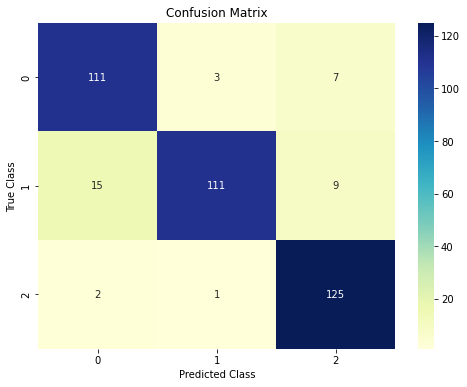

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat model KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Melatih model
knn_classifier.fit(X_train_oversampled2, y_train_oversampled2)

# Melakukan prediksi pada data oversampled
y_pred_oversampled = knn_classifier.predict(X_test_oversampled2)

# Evaluasi model
accuracy_oversampled = accuracy_score(y_test_oversampled2, y_pred_oversampled)
report_oversampled = classification_report(y_test_oversampled2, y_pred_oversampled)
confusion_mat_oversampled = confusion_matrix(y_test_oversampled2, y_pred_oversampled)

print("Accuracy:", accuracy_oversampled)
print("Classification Report:\n", report_oversampled)

# Memvisualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_oversampled, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


Accuracy: 0.890625
Classification Report:
               precision    recall  f1-score   support

        Good       0.84      0.88      0.86       121
    Moderate       0.92      0.81      0.86       135
   Unhealthy       0.91      0.98      0.95       128

    accuracy                           0.89       384
   macro avg       0.89      0.89      0.89       384
weighted avg       0.89      0.89      0.89       384



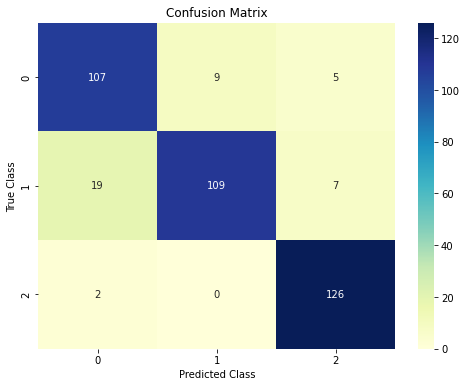

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat model Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)

# Melatih model
gb_classifier.fit(X_train_oversampled2, y_train_oversampled2)

# Melakukan prediksi pada data oversampled
y_pred_oversampled = gb_classifier.predict(X_test_oversampled2)

# Evaluasi model
accuracy_oversampled = accuracy_score(y_test_oversampled2, y_pred_oversampled)
report_oversampled = classification_report(y_test_oversampled2, y_pred_oversampled)
confusion_mat_oversampled = confusion_matrix(y_test_oversampled2, y_pred_oversampled)

print("Accuracy:", accuracy_oversampled)
print("Classification Report:\n", report_oversampled)

# Memvisualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_oversampled, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding string labels to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_oversampled2)
y_test_encoded = label_encoder.transform(y_test_oversampled2)

# Membuat model XGBoost
xgb_classifier = XGBClassifier(random_state=42)

# Melatih model
xgb_classifier.fit(X_train_oversampled2, y_train_encoded)

# Melakukan prediksi pada data oversampled
y_pred_oversampled = xgb_classifier.predict(X_test_oversampled2)

# Evaluasi model
accuracy_oversampled = accuracy_score(y_test_encoded, y_pred_oversampled)
report_oversampled = classification_report(y_test_encoded, y_pred_oversampled)
confusion_mat_oversampled = confusion_matrix(y_test_encoded, y_pred_oversampled)

print("Accuracy:", accuracy_oversampled)
print("Classification Report:\n", report_oversampled)

# Memvisualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_oversampled, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat model SVM
svm_classifier = SVC(random_state=42)

# Melatih model
svm_classifier.fit(X_train_oversampled2, y_train_oversampled2)

# Melakukan prediksi pada data oversampled
y_pred_oversampled = svm_classifier.predict(X_test_oversampled2)

# Evaluasi model
accuracy_oversampled = accuracy_score(y_test_oversampled2, y_pred_oversampled)
report_oversampled = classification_report(y_test_oversampled2, y_pred_oversampled)
confusion_mat_oversampled = confusion_matrix(y_test_oversampled2, y_pred_oversampled)

print("Accuracy:", accuracy_oversampled)
print("Classification Report:\n", report_oversampled)

# Memvisualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_oversampled, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

        Good       0.56      0.49      0.52       121
    Moderate       0.50      0.60      0.55       135
   Unhealthy       0.86      0.78      0.82       128

    accuracy                           0.62       384
   macro avg       0.64      0.62      0.63       384
weighted avg       0.64      0.62      0.63       384



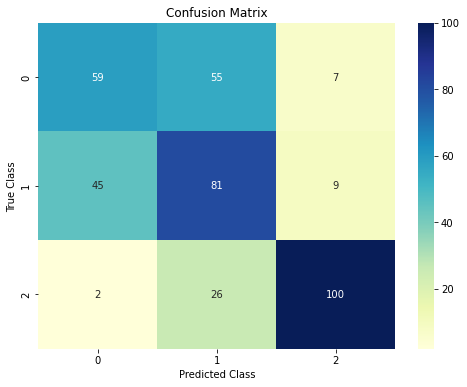

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat model AdaBoost
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Melatih model
adaboost_classifier.fit(X_train_oversampled2, y_train_oversampled2)

# Melakukan prediksi pada data oversampled
y_pred_oversampled = adaboost_classifier.predict(X_test_oversampled2)

# Evaluasi model
accuracy_oversampled = accuracy_score(y_test_oversampled2, y_pred_oversampled)
report_oversampled = classification_report(y_test_oversampled2, y_pred_oversampled)
confusion_mat_oversampled = confusion_matrix(y_test_oversampled2, y_pred_oversampled)

print("Accuracy:", accuracy_oversampled)
print("Classification Report:\n", report_oversampled)

# Memvisualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_oversampled, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [69]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.9296875
Classification Report:
               precision    recall  f1-score   support

        Good       0.90      0.89      0.90       121
    Moderate       0.93      0.90      0.92       135
   Unhealthy       0.95      0.99      0.97       128

    accuracy                           0.93       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.93      0.93      0.93       384



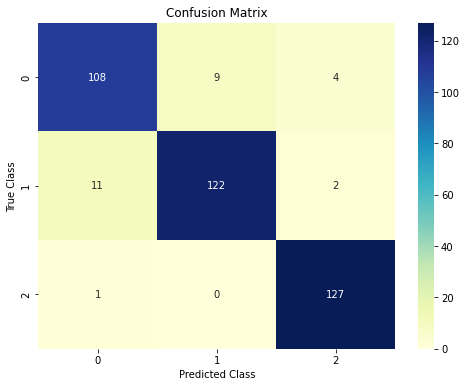

In [70]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat model CatBoost
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

# Melatih model
catboost_classifier.fit(X_train_oversampled2, y_train_oversampled2)

# Melakukan prediksi pada data oversampled
y_pred_oversampled = catboost_classifier.predict(X_test_oversampled2)

# Evaluasi model
accuracy_oversampled = accuracy_score(y_test_oversampled2, y_pred_oversampled)
report_oversampled = classification_report(y_test_oversampled2, y_pred_oversampled)
confusion_mat_oversampled = confusion_matrix(y_test_oversampled2, y_pred_oversampled)

print("Accuracy:", accuracy_oversampled)
print("Classification Report:\n", report_oversampled)

# Memvisualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_oversampled, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat model CatBoost
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

# Menggunakan StratifiedKFold dengan 5 lipatan
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan skor akurasi untuk setiap lipatan
accuracies = []

# Iterasi melalui setiap lipatan
for train_index, test_index in kfold.split(X_train_oversampled2, y_train_oversampled2):
    X_train_fold, X_test_fold = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train_fold, y_test_fold = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
    # Melatih model
    catboost_classifier.fit(X_train_fold, y_train_fold)
    
    # Melakukan prediksi pada set pengujian
    y_pred_fold = catboost_classifier.predict(X_test_fold)
    
    # Menghitung dan menyimpan akurasi
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(accuracy_fold)

# Menampilkan akurasi untuk setiap lipatan
print("Accuracies for each fold:", accuracies)

# Menampilkan rata-rata akurasi
print("Average accuracy:", sum(accuracies) / len(accuracies))


# normalisasi

In [ ]:
X1 = df.drop(["Category","Date","Critical Component"],axis=1)
y1 = df["Category"]

In [72]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Contoh dataset klasifikasi (ganti dengan dataset sesuai kebutuhan)
from sklearn.datasets import load_digits
digits = load_digits()
X1 = df.drop(["Category","Date","Critical Component"], axis=1)
y1 = df["Category"]

# Normalisasi menggunakan Min-Max Scaling
scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)

# Pembagian data training dan testing (80:20)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)

# Membuat model CatBoost
model = CatBoostClassifier(random_state=42, verbose=0)

# Melatih model dengan data training
model.fit(X1_train, y1_train)

# Melakukan prediksi pada data testing
y1_pred = model.predict(X1_test)

# Mengukur akurasi model
accuracy = accuracy_score(y1_test, y1_pred)
print(f'Akurasi model CatBoost setelah normalisasi: {accuracy * 100:.2f}%')

# Menampilkan classification report
print("Classification Report:\n", classification_report(y1_test, y1_pred))


Akurasi model CatBoost setelah normalisasi: 84.55%
Classification Report:
               precision    recall  f1-score   support

        Good       0.81      0.79      0.80        76
    Moderate       0.87      0.91      0.89       130
   Unhealthy       0.73      0.57      0.64        14

    accuracy                           0.85       220
   macro avg       0.80      0.76      0.78       220
weighted avg       0.84      0.85      0.84       220



In [73]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
X = df.drop(["Category","Date","Critical Component"],axis=1)
y = df["Category"]


# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalisasi menggunakan Min-Max Scaling
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Membagi data menjadi data latih dan data uji
X_train_oversampled2, X_test_oversampled2, y_train_oversampled2, y_test_oversampled2 = train_test_split(
    X_resampled_scaled, y_resampled, test_size=0.2, random_state=42
)

# Membuat model CatBoost
model = CatBoostClassifier(random_state=42, verbose=0)

# Melatih model dengan data training oversampled dan dinormalisasi
model.fit(X_train_oversampled2, y_train_oversampled2)

# Melakukan prediksi pada data testing oversampled
y_pred_oversampled = model.predict(X_test_oversampled2)

# Mengukur akurasi model
accuracy_oversampled = accuracy_score(y_test_oversampled2, y_pred_oversampled)
print(f'Akurasi model CatBoost setelah oversampling dan normalisasi: {accuracy_oversampled * 100:.2f}%')

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_test_oversampled2, y_pred_oversampled))

Akurasi model CatBoost setelah oversampling dan normalisasi: 92.97%
Classification Report:
               precision    recall  f1-score   support

        Good       0.90      0.89      0.90       121
    Moderate       0.93      0.90      0.92       135
   Unhealthy       0.95      0.99      0.97       128

    accuracy                           0.93       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.93      0.93      0.93       384

